# Diamonds Sales Exploratory Data Analysis and Prediction using ANN

This project aims to predict the sales prices of diamonds using Artificial Neural Networks.

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle 
import joblib
import matplotlib
import sklearn
import tensorflow as tf
import keras


C:\Users\Sarah\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading Data

In [2]:
data = pd.read_csv("./diamonds.csv")
data.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


## Data Preprocessing

#### Checking if any column has null values

In [3]:
data.isnull().sum()

Unnamed: 0                     0
cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

#### Droping ' ***unnamed*** ' column 

In [4]:
data = data.drop(columns='Unnamed: 0')

In [5]:
data.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          219703 non-null  object 
 1   color                        219703 non-null  object 
 2   clarity                      219703 non-null  object 
 3   carat_weight                 219703 non-null  float64
 4   cut_quality                  219703 non-null  object 
 5   lab                          219703 non-null  object 
 6   symmetry                     219703 non-null  object 
 7   polish                       219703 non-null  object 
 8   eye_clean                    219703 non-null  object 
 9   culet_size                   219703 non-null  object 
 10  culet_condition              219703 non-null  object 
 11  depth_percent                219703 non-null  float64
 12  table_percent                219703 non-null  float64
 13 

In [7]:
data.describe()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


Checking for unique values in each column in the dataset

In [8]:
data.nunique()

cut                               11
color                             11
clarity                           11
carat_weight                     878
cut_quality                        6
lab                                3
symmetry                           5
polish                             5
eye_clean                          5
culet_size                         9
culet_condition                    4
depth_percent                    534
table_percent                    235
meas_length                     1415
meas_width                      1155
meas_depth                       852
girdle_min                        10
girdle_max                        10
fluor_color                        6
fluor_intensity                    8
fancy_color_dominant_color        13
fancy_color_secondary_color       11
fancy_color_overtone               9
fancy_color_intensity             10
total_sales_price              22202
dtype: int64

#### Dropping any duplicate rows

In [9]:
data[data.duplicated()]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
111,Round,L,I2,0.31,Very Good,GIA,Very Good,Very Good,unknown,unknown,...,2.75,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,274
238,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,326
240,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,326
241,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,326
276,Round,F,VVS2,0.14,Excellent,IGI,Excellent,Excellent,unknown,unknown,...,0.00,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219494,Radiant,unknown,VS1,15.95,unknown,GIA,Good,Very Good,unknown,unknown,...,8.57,M,STK,unknown,Faint,Yellow,unknown,None,Fancy,378829
219506,Radiant,G,VS2,9.05,unknown,GIA,Very Good,Very Good,Yes,N,...,7.55,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,385128
219542,Emerald,K,VS2,15.14,unknown,GIA,Very Good,Excellent,Yes,N,...,7.78,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,420529
219551,Princess,G,VS2,9.05,unknown,GIA,Very Good,Very Good,Yes,N,...,7.55,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,431217


In [10]:
print(len(data[data.duplicated()]))

3880


In [11]:
data.shape

(219703, 25)

In [12]:
data = data.drop_duplicates()
data.shape

(215823, 25)

### Some Basic Exploratory Data Analysis

#### Starting off with the cut

As we can see the ***round*** cut covers 71.7% of the cuts

In [13]:
# Helper function to calculate the percentages of each unique value in a column

def calculate_percentages(column_name):
    percentages = {}
    for i in data[column_name].unique():
        percentages[i] = data[column_name].value_counts()[i] / data.shape[0] * 100
    return percentages
calculate_percentages('cut')

{'Round': 71.72219828285216,
 'Pear': 4.55095147412463,
 'Oval': 6.40154200432762,
 'Marquise': 1.3501804719608197,
 'Princess': 3.2369117285924114,
 'Emerald': 5.090745657321046,
 'Heart': 2.1999508856794687,
 'Cushion': 0.24510826000935954,
 'Radiant': 2.5873053381706304,
 'Cushion Modified': 1.8329835096352103,
 'Asscher': 0.7821223873266518}

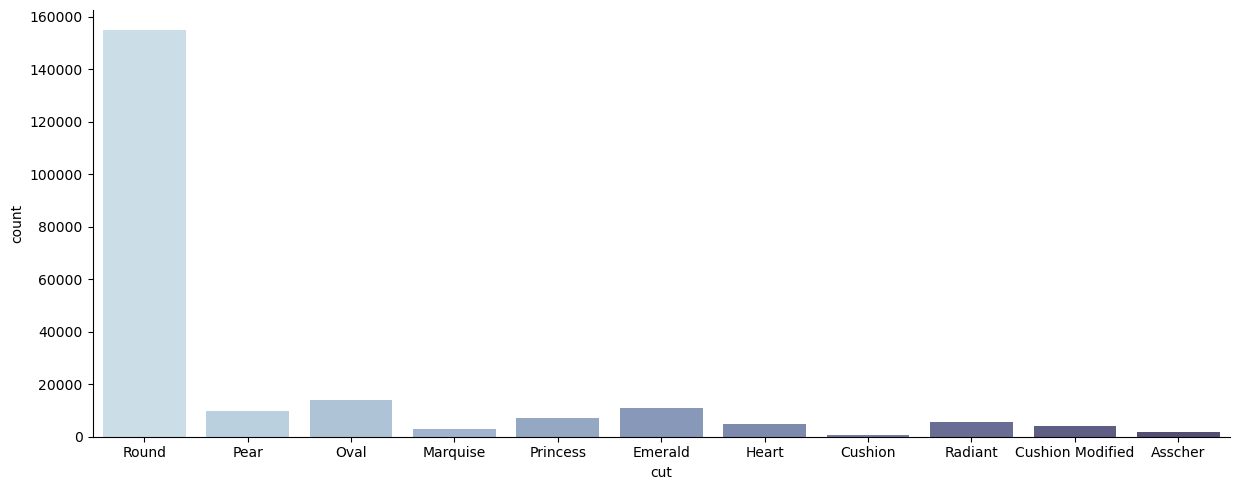

In [14]:
sns.set_palette(palette="ch:s=.25,rot=-.25", n_colors=14)
shapes = data['cut'].unique()

sns.catplot(x='cut', data=data, kind='count', order=shapes, aspect=2.5)


#### Moving on with the color

 ***E*** color covers 15% of the colors

In [15]:
calculate_percentages('color')

{'E': 15.059562697210213,
 'F': 14.373352237713311,
 'L': 2.5845252822915077,
 'D': 14.127780635057432,
 'J': 7.718361805738962,
 'I': 10.136083735283078,
 'G': 13.257623144891879,
 'H': 11.782803501017037,
 'M': 1.3877112263289826,
 'K': 5.353924280544706,
 'unknown': 4.218271453922891}

In [16]:
sns.set_palette(palette="ch:s=.25,rot=-.25", n_colors=14)
colors = data['color'].unique()

sns.catplot(x='color', data=data, kind='count', order=colors, aspect=2.5)


#### Moving on with the Clarity


In [17]:
calculate_percentages('clarity')

{'VVS2': 13.115840295056596,
 'VVS1': 12.620990348572672,
 'I1': 3.2109645403872613,
 'VS1': 16.716012658521105,
 'VS2': 17.37256918864069,
 'IF': 4.502763838886495,
 'SI2': 14.276976967237044,
 'I2': 0.4346154024362557,
 'SI1': 17.702932495609826,
 'SI3': 0.004170083818684756,
 'I3': 0.042164180833368085}

In [18]:
sns.set_palette(palette="ch:s=.25,rot=-.25", n_colors=14)
clarity = data['clarity'].unique()

sns.catplot(x='clarity', data=data, kind='count', order=clarity, aspect=2.5)


In [19]:
numerical_cols = []

for i in data:
    if data[i].dtype in ['int32', 'int64', 'float64']:
        numerical_cols.append(i)
numerical_cols

['carat_weight',
 'depth_percent',
 'table_percent',
 'meas_length',
 'meas_width',
 'meas_depth',
 'total_sales_price']

### Chaning categorical values by encoding using Label Encoder

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lnc = LabelEncoder()
df = data.copy()
for i in data:
    r = data[i].dtypes
    if r == 'object':
        df[i] = lnc.fit_transform(data[i])
        joblib.dump(lnc, i+'.joblib', compress=9)

In [22]:
df.head(20)

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,10,1,10,0.09,0,2,4,4,4,3,...,1.79,0,0,5,2,12,10,8,9,200
1,10,1,10,0.09,4,2,4,4,4,3,...,1.78,1,1,5,2,12,10,8,9,200
2,10,1,10,0.09,0,2,4,4,4,8,...,1.77,4,0,5,2,12,10,8,9,200
3,10,1,10,0.09,0,2,4,4,4,8,...,1.78,0,1,5,2,12,10,8,9,200
4,10,1,10,0.09,4,2,4,0,4,3,...,1.82,1,1,5,2,12,10,8,9,200
5,10,1,10,0.09,4,2,4,4,4,3,...,1.81,4,0,5,2,12,10,8,9,200
6,10,1,10,0.09,4,2,4,4,4,8,...,1.84,1,1,5,2,12,10,8,9,200
7,10,1,10,0.09,0,2,4,4,4,3,...,1.78,0,0,5,2,12,10,8,9,200
8,10,1,10,0.09,4,2,4,4,4,3,...,1.85,1,3,5,2,12,10,8,9,200
9,10,1,10,0.09,0,2,4,4,4,3,...,1.80,0,0,5,2,12,10,8,9,200


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215823 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          215823 non-null  int32  
 1   color                        215823 non-null  int32  
 2   clarity                      215823 non-null  int32  
 3   carat_weight                 215823 non-null  float64
 4   cut_quality                  215823 non-null  int32  
 5   lab                          215823 non-null  int32  
 6   symmetry                     215823 non-null  int32  
 7   polish                       215823 non-null  int32  
 8   eye_clean                    215823 non-null  int32  
 9   culet_size                   215823 non-null  int32  
 10  culet_condition              215823 non-null  int32  
 11  depth_percent                215823 non-null  float64
 12  table_percent                215823 non-null  float64
 13 

## Outlier detection

Plotting each feature variable and do a qualitative analysis.

In [24]:
def plot_cols():
    for i in df:
        r = df[i].dtypes
        if r == 'float64':
            plt.scatter(range(len(df)), df[i], label = i, color = 'orange')
            plt.legend()
            plt.gcf().set_size_inches((5, 3))    
            plt.show()

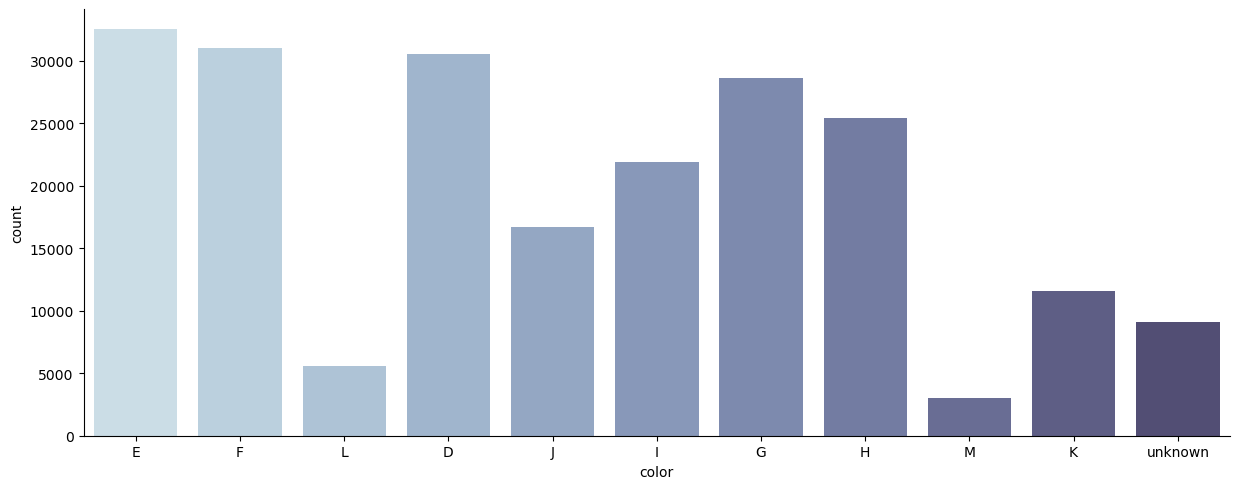

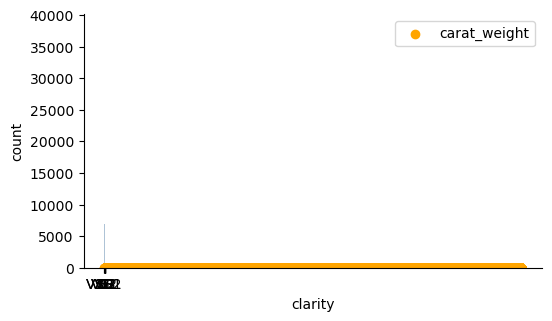

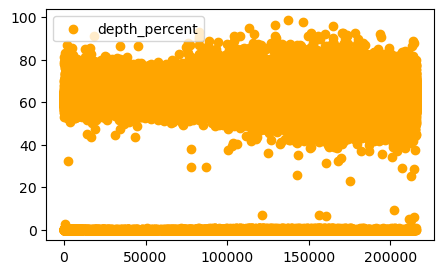

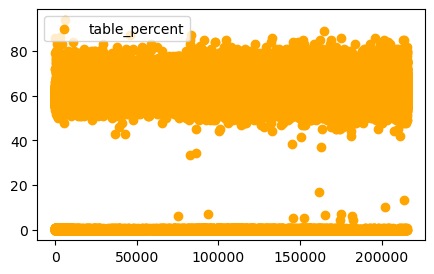

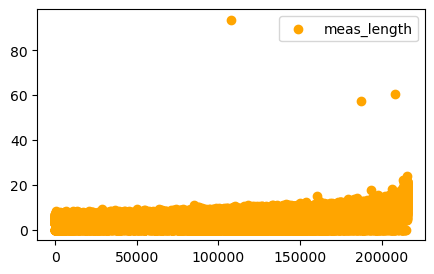

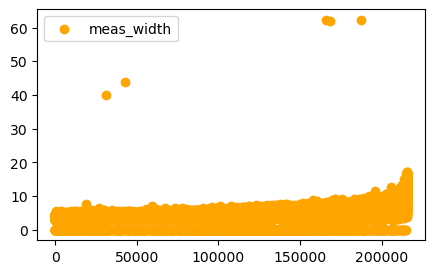

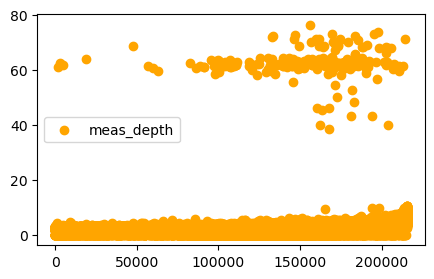

In [25]:
plot_cols()

In [26]:
df = df[(df['meas_length']<40)]
df = df[(df['meas_width']<30)]
df = df[(df['meas_depth']<30)]

#### Checking for zero values in the specified columns

In [27]:
df[(df['meas_length'] == 0) | (df['meas_width'] == 0) | (df['meas_depth'] == 0) | (df['depth_percent'] == 0) | (df['table_percent'] == 0) ]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
24,10,8,0,0.34,0,2,0,0,4,8,...,0.00,9,9,5,2,12,10,8,9,204
25,10,2,9,0.09,0,2,4,4,4,8,...,0.00,9,9,5,2,12,10,8,9,204
26,10,1,9,0.09,4,2,4,4,4,8,...,0.00,9,9,5,5,12,10,8,9,204
44,10,0,7,0.11,0,2,4,0,4,8,...,0.00,9,9,5,2,12,10,8,9,222
45,10,1,7,0.11,0,2,4,4,4,8,...,0.00,9,9,5,2,12,10,8,9,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218830,10,1,4,5.07,0,0,0,4,4,3,...,0.00,9,9,0,1,12,10,8,9,160984
219389,7,10,10,15.52,5,0,4,0,4,8,...,6.34,1,3,5,2,11,1,8,3,302640
219415,10,2,7,6.28,0,0,0,0,4,3,...,7.24,4,4,5,2,12,10,8,9,320733
219530,7,4,7,11.95,5,1,4,0,4,8,...,7.76,1,1,5,1,12,10,8,9,408347


### Gathering insights with respect to total_sales_price

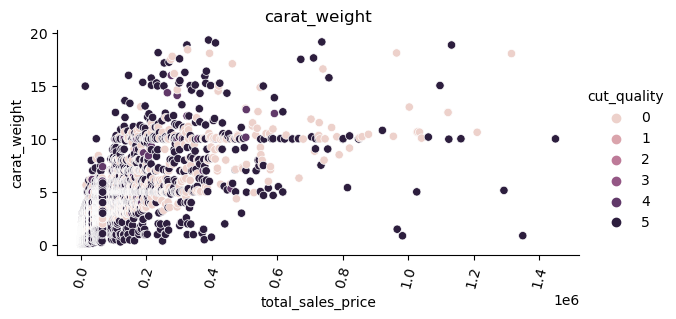

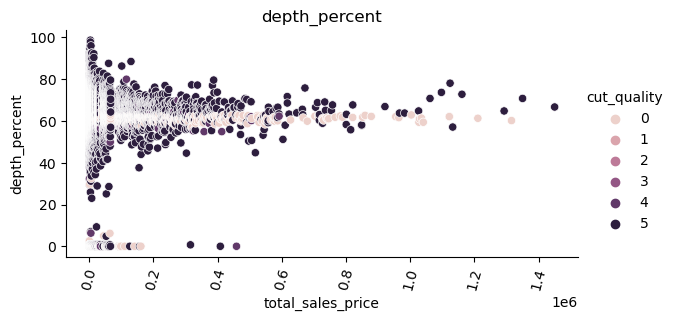

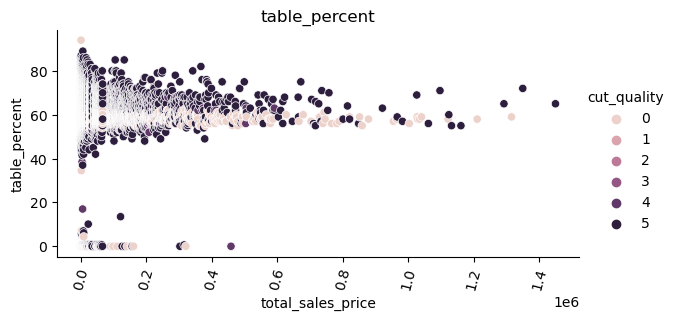

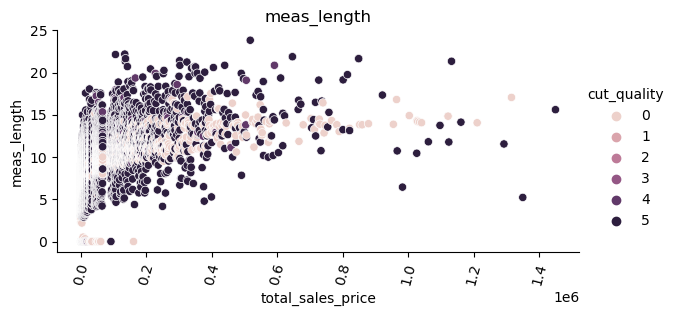

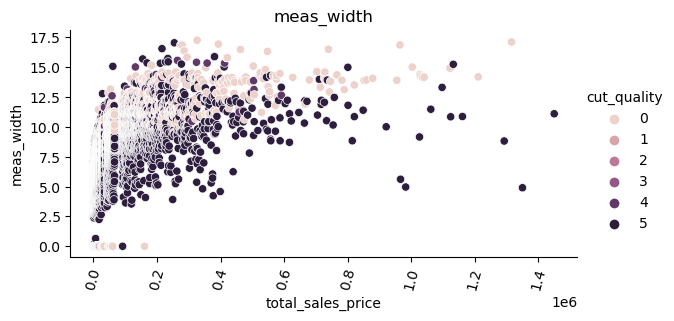

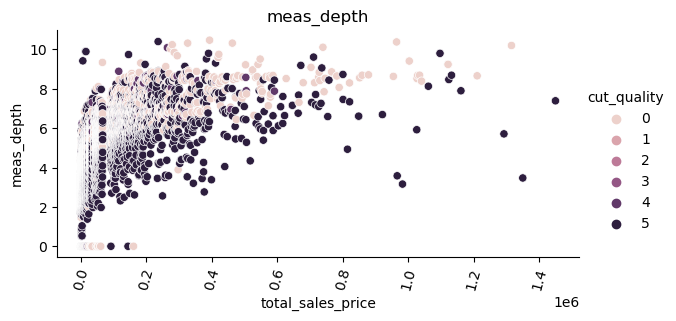

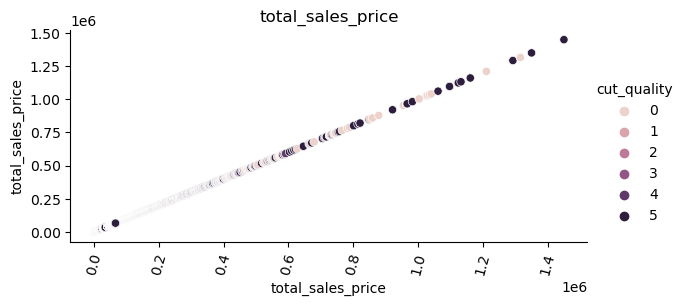

In [28]:
for cat in numerical_cols:
    sns.relplot(data=df,x='total_sales_price',y=cat, hue="cut_quality", aspect = 2, height = 3)
    plt.xticks(rotation=75)
    plt.title(cat)
    
    plt.show()

In [29]:
top_sales_price_carat_weight=data[['carat_weight','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10]
top_sales_price_carat_weight

,carat_weight,total_sales_price
219702,10.03,1449881
219701,0.90,1350000
219700,18.07,1315496
219699,5.17,1292500
219698,10.65,1210692
219697,10.04,1161102
219696,18.88,1132347
219695,10.00,1124122
219694,12.52,1121792
219693,12.52,1121792


In [30]:
top_sales_price_cut_quality=data[['cut_quality','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10]
top_sales_price_cut_quality

,cut_quality,total_sales_price
219702,unknown,1449881
219701,unknown,1350000
219700,Excellent,1315496
219699,unknown,1292500
219698,Excellent,1210692
219697,unknown,1161102
219696,unknown,1132347
219695,unknown,1124122
219694,Excellent,1121792
219693,Excellent,1121792


In [31]:
top_sales_price_polish=data[['polish','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10]
top_sales_price_polish

,polish,total_sales_price
219702,Excellent,1449881
219701,Good,1350000
219700,Excellent,1315496
219699,Very Good,1292500
219698,Excellent,1210692
219697,Excellent,1161102
219696,Excellent,1132347
219695,Excellent,1124122
219694,Excellent,1121792
219693,Excellent,1121792


In [32]:
top_sales_price_meas_length=data[['meas_length','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10]
top_sales_price_meas_length

,meas_length,total_sales_price
219702,15.61,1449881
219701,5.22,1350000
219700,17.06,1315496
219699,11.55,1292500
219698,14.06,1210692
219697,14.13,1161102
219696,21.34,1132347
219695,11.78,1124122
219694,14.84,1121792
219693,14.84,1121792


In [33]:
top_sales_price_clarity=data[['clarity','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10]
top_sales_price_clarity

,clarity,total_sales_price
219702,VVS2,1449881
219701,SI2,1350000
219700,VS1,1315496
219699,VS2,1292500
219698,VS1,1210692
219697,VS1,1161102
219696,VS2,1132347
219695,VVS1,1124122
219694,IF,1121792
219693,IF,1121792


In [34]:
top_sales_price_cut=data[['cut','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10]
top_sales_price_cut

,cut,total_sales_price
219702,Pear,1449881
219701,Princess,1350000
219700,Round,1315496
219699,Radiant,1292500
219698,Round,1210692
219697,Oval,1161102
219696,Oval,1132347
219695,Cushion Modified,1124122
219694,Round,1121792
219693,Round,1121792


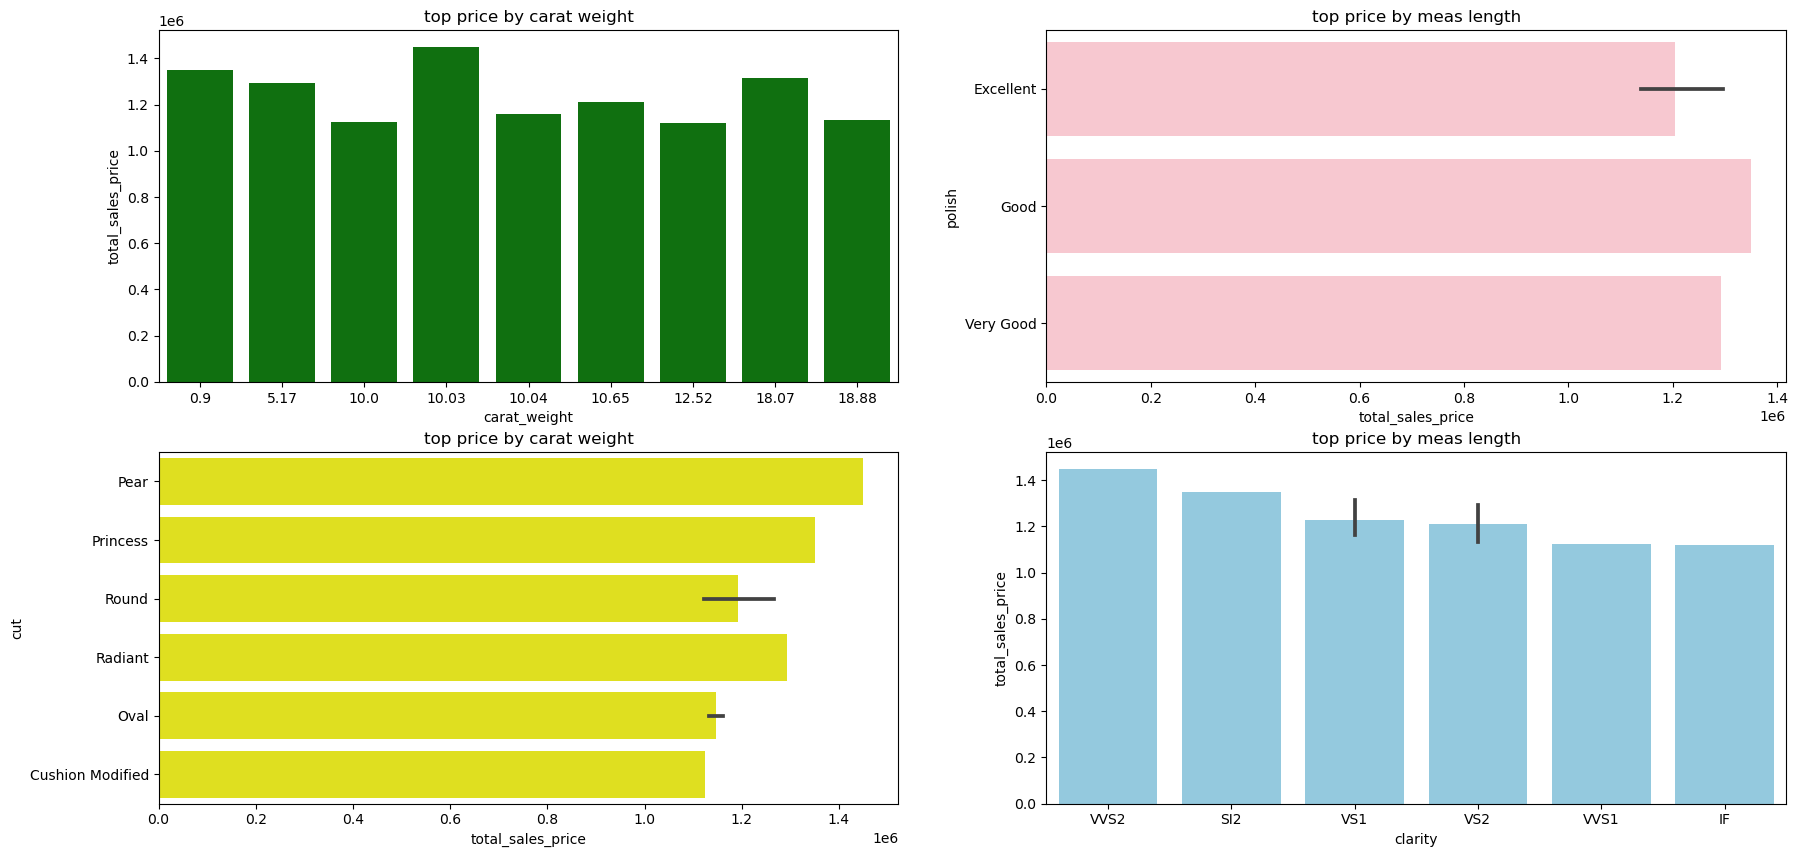

In [35]:
plt.figure(figsize=(21, 21))
plt.subplot(4, 2, 1)
sns.barplot(data = top_sales_price_carat_weight,x='carat_weight',y='total_sales_price',color='green')
plt.title('top price by carat weight')
plt.subplot(4,2,2)
sns.barplot(data = top_sales_price_polish,x='total_sales_price',y='polish',color='pink', orient='h')
plt.title('top price by meas length')
plt.subplot(4,2,3)
sns.barplot(data = top_sales_price_cut,x='total_sales_price',y='cut',color='yellow',orient='h')
plt.title('top price by carat weight')
plt.subplot(4,2,4)
sns.barplot(data = top_sales_price_clarity,x='clarity',y='total_sales_price',color='skyblue')
plt.title('top price by meas length')
plt.show()

### Removing zero values as they are insignificant

In [36]:
df2 = df.copy()
df2 = df2[(df2['meas_length']!=0)]
df2 = df2[(df2['meas_width']!=0)]
df2 = df2[(df2['meas_depth']!=0)]
df2 = df2[(df2['depth_percent']!=0)]
df2 = df2[(df2['table_percent']!=0)]

print(df.shape)
print(df2.shape)

(215599, 25)
(210513, 25)


### Feature Selection and Data Splitting

Quantitative analysis by feature correlation

High correlation between two features can indicate redundancy. Removing one of the highly correlated features is used to reduce dimensionality, and potentially improve model interpretability.

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# To normalize inputs
ss = MinMaxScaler()
corr = df2.corr()
sns.heatmap(corr)

<AxesSubplot:>

In [38]:
X = df2.loc[:, df2.columns!='total_sales_price']
X

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity
0,10,1,10,0.09,0,2,4,4,4,3,...,2.87,1.79,0,0,5,2,12,10,8,9
1,10,1,10,0.09,4,2,4,4,4,3,...,2.89,1.78,1,1,5,2,12,10,8,9
2,10,1,10,0.09,0,2,4,4,4,8,...,2.90,1.77,4,0,5,2,12,10,8,9
3,10,1,10,0.09,0,2,4,4,4,8,...,2.88,1.78,0,1,5,2,12,10,8,9
4,10,1,10,0.09,4,2,4,0,4,3,...,2.83,1.82,1,1,5,2,12,10,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,10,1,7,10.65,0,0,0,0,4,3,...,14.18,8.66,0,1,5,2,12,10,8,9
219699,9,10,8,5.17,5,0,4,4,4,8,...,8.81,5.71,3,7,5,2,5,10,3,5
219700,10,1,7,18.07,0,0,0,0,4,3,...,17.10,10.20,4,0,5,2,12,10,8,9
219701,8,10,5,0.90,5,0,2,2,4,3,...,4.90,3.47,8,5,5,0,10,10,8,1


In [39]:
X.describe()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity
count,210513.000000,210513.000000,210513.000000,210513.000000,210513.000000,210513.000000,210513.000000,210513.000000,210513.000000,210513.000000,...,210513.000000,210513.000000,210513.000000,210513.000000,210513.000000,210513.000000,210513.000000,210513.000000,210513.000000,210513.000000
mean,8.703496,3.409039,6.570364,0.759769,2.011866,0.142908,1.545686,0.772983,3.693425,4.876986,...,5.176669,3.256034,4.055327,4.540375,4.636730,1.724369,11.896914,9.972040,7.953675,8.750424
std,2.398115,2.673888,2.505563,0.847960,2.325024,0.503025,1.924413,1.570151,0.500875,2.415709,...,1.283402,0.815477,3.987766,3.690743,1.293981,1.078498,0.725732,0.449053,0.489449,1.261228
min,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.210000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,4.000000,0.310000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,...,4.310000,2.680000,0.000000,1.000000,5.000000,1.000000,12.000000,10.000000,8.000000,9.000000
50%,10.000000,3.000000,7.000000,0.500000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,...,4.800000,3.040000,3.000000,3.000000,5.000000,2.000000,12.000000,10.000000,8.000000,9.000000
75%,10.000000,5.000000,9.000000,1.000000,5.000000,0.000000,4.000000,0.000000,4.000000,8.000000,...,5.710000,3.660000,9.000000,9.000000,5.000000,2.000000,12.000000,10.000000,8.000000,9.000000
max,10.000000,10.000000,10.000000,19.350000,5.000000,2.000000,4.000000,4.000000,4.000000,8.000000,...,17.250000,10.470000,9.000000,9.000000,5.000000,7.000000,12.000000,10.000000,8.000000,9.000000


In [40]:
# Normalizatoin

X_normalized = ss.fit_transform(X)
X_normalized

array([[1.        , 0.1       , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.1       , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.1       , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.1       , 0.7       , ..., 1.        , 1.        ,
        1.        ],
       [0.8       , 1.        , 0.5       , ..., 1.        , 1.        ,
        0.11111111],
       [0.7       , 1.        , 1.        , ..., 1.        , 1.        ,
        0.66666667]])

In [41]:
X_normalized.shape

(210513, 24)

In [42]:
features = X.columns
features

Index(['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab',
       'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition',
       'depth_percent', 'table_percent', 'meas_length', 'meas_width',
       'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity'],
      dtype='object')

In [43]:
X = X_normalized

In [44]:
y = df2.iloc[:,df2.columns == 'total_sales_price'].values.ravel()
y

array([    200,     200,     200, ..., 1315496, 1350000, 1449881],
      dtype=int64)

### Analyzing the best features based on scores

In [45]:
from sklearn.feature_selection import SelectKBest as skb
from sklearn.feature_selection import f_regression

fs = skb(f_regression, k='all')
fs.fit(X,y)
for i in range(len(fs.scores_)):
    print(f'{features[i]}: {fs.scores_[i]}')
    

cut: 2350.2458248351204
color: 762.7458345115368
clarity: 7.404681099812156
carat_weight: 262560.92284185794
cut_quality: 1256.0603661186426
lab: 51.814592060744985
symmetry: 15.197575443276655
polish: 0.7552015160088846
eye_clean: 699.8420380477492
culet_size: 61.5991921463693
culet_condition: 93.9007012974945
depth_percent: 178.0976685133713
table_percent: 796.5647829749493
meas_length: 73702.35200676098
meas_width: 87254.21432054632
meas_depth: 87641.85496137085
girdle_min: 0.2465947113980541
girdle_max: 9.204294845991466
fluor_color: 191.82995841698812
fluor_intensity: 1.5975834008530905
fancy_color_dominant_color: 1217.865324929582
fancy_color_secondary_color: 114.29133501292345
fancy_color_overtone: 194.2803142126662
fancy_color_intensity: 1492.6022149038843


### Selecting 12 best features out of the 24

In [46]:
fs = skb(f_regression, k=12)
Xnew = fs.fit_transform(X, y)
f = np.array(features)
filt = fs.get_support()
f = f[filt]
print(f, len(f))

['cut' 'color' 'carat_weight' 'cut_quality' 'eye_clean' 'table_percent'
 'meas_length' 'meas_width' 'meas_depth' 'fancy_color_dominant_color'
 'fancy_color_overtone' 'fancy_color_intensity'] 12


In [47]:
Xnew = X
# convert to a columnar vector
y = y.reshape(-1, 1)
print(Xnew.shape)
print(y.shape)

(210513, 24)
(210513, 1)


### Training the model

In [48]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(Xnew, y, test_size=.28, random_state=40)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(151569, 24) (151569, 1)
(58944, 24) (58944, 1)


In [49]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, LearningRateScheduler


In [50]:
def learning_rate_schedule(epoch, lr):
    if epoch < 200:
        return lr
    else:
        return lr * 0.1

In [ ]:
sns.set(style="whitegrid")
model = Sequential()
model.add(Dense(units = 200, input_dim=24, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 100, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(learning_rate_schedule)
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=2000, epochs=700, verbose=1, callbacks=[early_stopping, lr_scheduler])

Epoch 1/700
61/61 [==============================] - 1s 5ms/step - loss: 748519232.0000 - val_loss: 656879360.0000 - lr: 0.0010
Epoch 2/700
61/61 [==============================] - 0s 5ms/step - loss: 742864640.0000 - val_loss: 644590528.0000 - lr: 0.0010
Epoch 3/700
61/61 [==============================] - 0s 6ms/step - loss: 721558912.0000 - val_loss: 618295552.0000 - lr: 0.0010
Epoch 4/700
61/61 [==============================] - 0s 5ms/step - loss: 699527040.0000 - val_loss: 607896064.0000 - lr: 0.0010
Epoch 5/700
61/61 [==============================] - 0s 4ms/step - loss: 695133120.0000 - val_loss: 606661184.0000 - lr: 0.0010
Epoch 6/700
61/61 [==============================] - 0s 4ms/step - loss: 693757696.0000 - val_loss: 605274816.0000 - lr: 0.0010
Epoch 7/700
61/61 [==============================] - 0s 4ms/step - loss: 692193664.0000 - val_loss: 603648256.0000 - lr: 0.0010
Epoch 8/700
61/61 [==============================] - 0s 4ms/step - loss: 690308608.0000 - val_loss: 6016

61/61 [==============================] - 0s 4ms/step - loss: 210310480.0000 - val_loss: 155481248.0000 - lr: 0.0010
Epoch 65/700
61/61 [==============================] - 0s 4ms/step - loss: 209265680.0000 - val_loss: 154046720.0000 - lr: 0.0010
Epoch 66/700
61/61 [==============================] - 0s 4ms/step - loss: 208433184.0000 - val_loss: 153226464.0000 - lr: 0.0010
Epoch 67/700
61/61 [==============================] - 0s 4ms/step - loss: 207514080.0000 - val_loss: 152208256.0000 - lr: 0.0010
Epoch 68/700
61/61 [==============================] - 0s 4ms/step - loss: 206484736.0000 - val_loss: 152003728.0000 - lr: 0.0010
Epoch 69/700
61/61 [==============================] - 0s 4ms/step - loss: 205839168.0000 - val_loss: 151021488.0000 - lr: 0.0010
Epoch 70/700
61/61 [==============================] - 0s 4ms/step - loss: 205068816.0000 - val_loss: 150093552.0000 - lr: 0.0010
Epoch 71/700
61/61 [==============================] - 0s 4ms/step - loss: 204367472.0000 - val_loss: 149031920

61/61 [==============================] - 0s 5ms/step - loss: 181910240.0000 - val_loss: 130705720.0000 - lr: 0.0010
Epoch 128/700
61/61 [==============================] - 0s 5ms/step - loss: 181606048.0000 - val_loss: 130489344.0000 - lr: 0.0010
Epoch 129/700
61/61 [==============================] - 0s 4ms/step - loss: 181316368.0000 - val_loss: 131461872.0000 - lr: 0.0010
Epoch 130/700
61/61 [==============================] - 0s 4ms/step - loss: 181151632.0000 - val_loss: 129776920.0000 - lr: 0.0010
Epoch 131/700
61/61 [==============================] - 0s 4ms/step - loss: 181034352.0000 - val_loss: 130285632.0000 - lr: 0.0010
Epoch 132/700
61/61 [==============================] - 0s 4ms/step - loss: 180702784.0000 - val_loss: 129540032.0000 - lr: 0.0010
Epoch 133/700
61/61 [==============================] - 0s 4ms/step - loss: 180462528.0000 - val_loss: 129827072.0000 - lr: 0.0010
Epoch 134/700
61/61 [==============================] - 0s 4ms/step - loss: 180171904.0000 - val_loss: 13

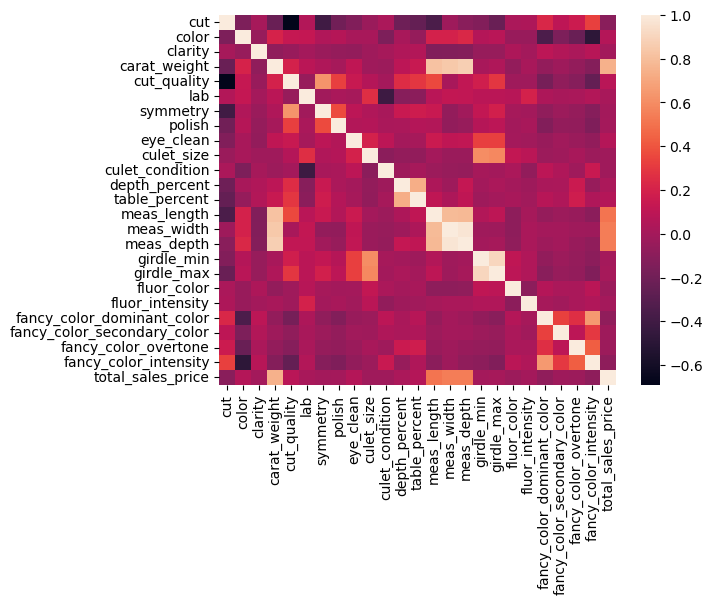

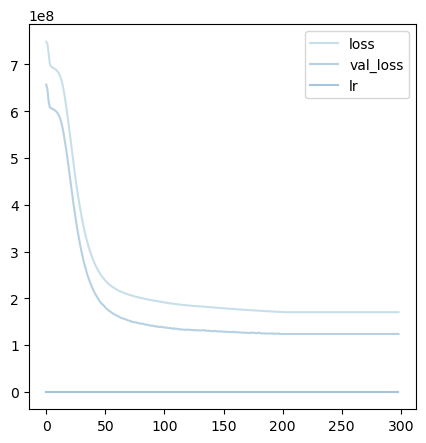

In [52]:
pd.DataFrame(history.history).plot(figsize=(5,5))
plt.show()

#### Predictions

In [53]:
from sklearn.metrics import r2_score

pred = model.predict(X_test)
r2 = r2_score(y_test, pred)*100

print('R Squared: ', r2)

1842/1842 [==============================] - 2s 798us/step
R Squared:  80.21626995609856


[2297.9336]
[1684]


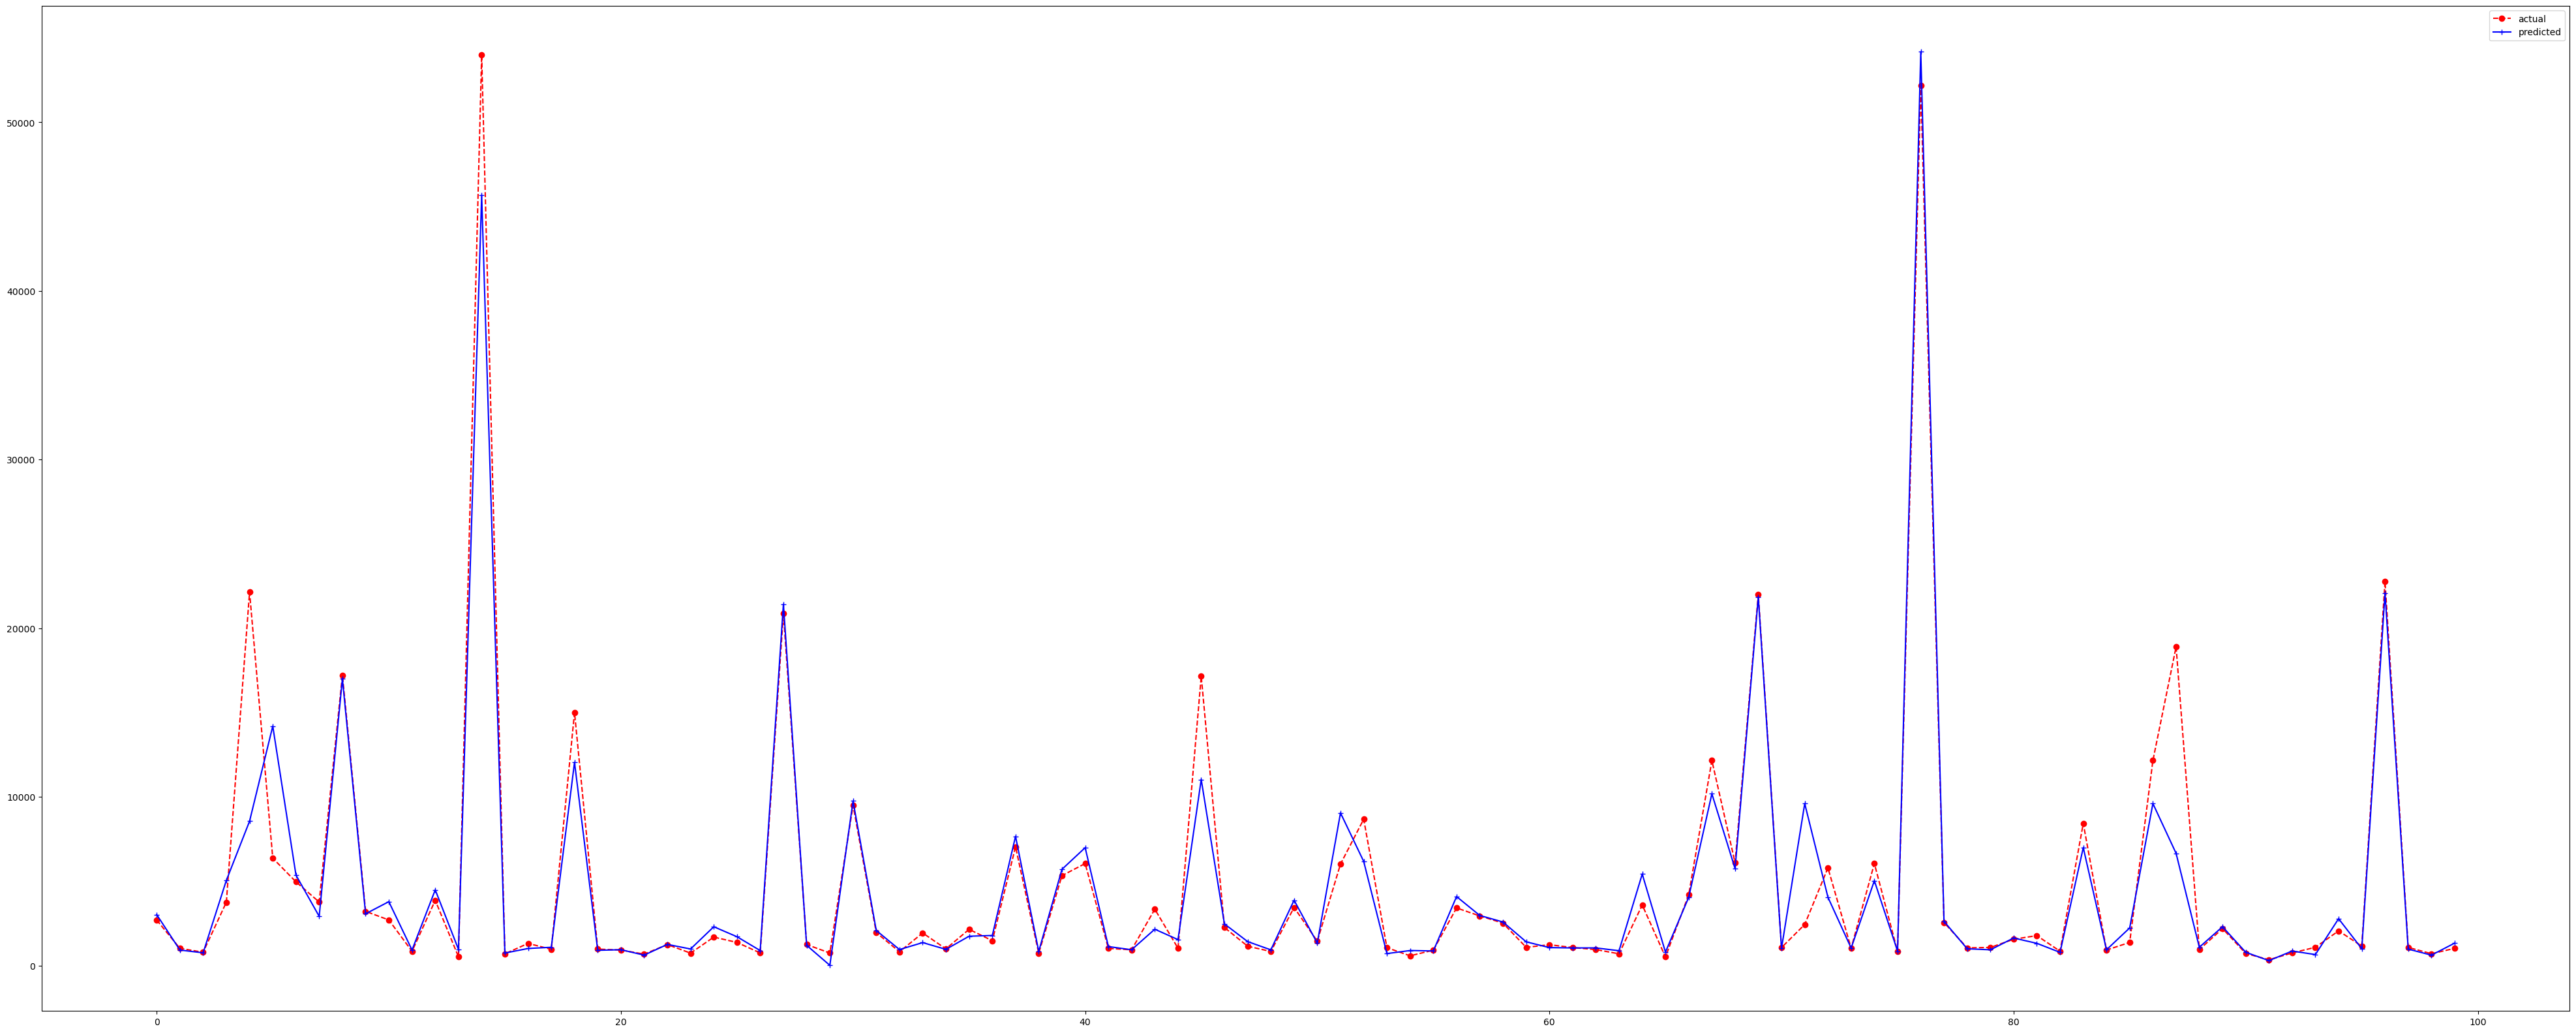

In [55]:
# plotting the fit

print(pred[5024])
print(y_test[5024])
plt.figure(figsize=(50,20))
plt.plot(y_test[5000:5100], 'ro--', label='actual')
plt.plot(pred[5000:5100], 'b+-', label='predicted')
plt.legend()
plt.show()

### Saving the model

In [ ]:
model.save('tf_m_1.0.0.keras')

In [57]:
model.save('tf_m_1.0.0.h5')